In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\Pushpalatha\AppData\Local\Temp\ipykernel_13424\2037871100.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cars = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [4]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
df = pd.concat([cars.iloc[:,2:4],cars.iloc[:,6:8],cars.iloc[:,8:10],cars.iloc[:,11:14], cars.iloc[:,17]],axis=1)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [7]:
df=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df

,Price,Age,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [8]:
df.isna().sum()

Price        0
Age          0
KM           0
Fuel_Type    0
HP           0
Met_Color    0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Met_Color  1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Met_Color,1436.0,0.674791,0.468616,0.0,0.0,1.0,1.00,1.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


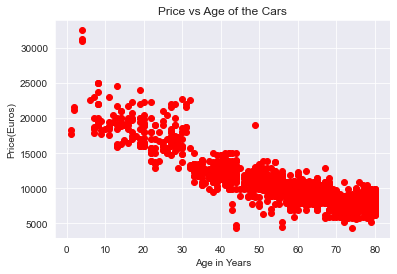

In [11]:
plt.scatter(df['Age'], cars['Price'], c = 'red')
plt.title('Price vs Age of the Cars')
plt.xlabel('Age in Years')
plt.ylabel('Price(Euros)')
plt.show()

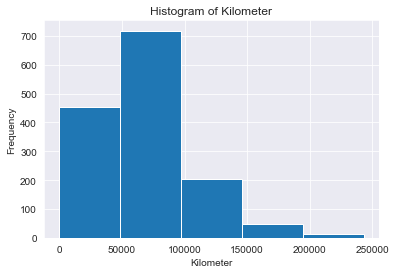

In [12]:
plt.hist(df['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

In [13]:
df["Fuel_Type"].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

<AxesSubplot:ylabel='Fuel_Type'>

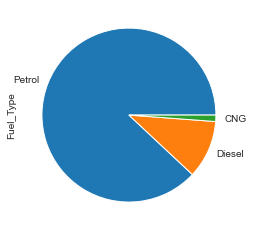

In [14]:
df["Fuel_Type"].value_counts().plot(kind = 'pie')

In [15]:
df["HP"].value_counts()

110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: HP, dtype: int64

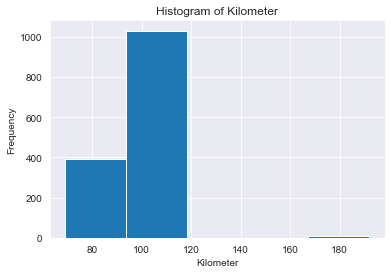

In [16]:
plt.hist(df['HP'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

In [17]:
df["Met_Color"].value_counts()

1    969
0    467
Name: Met_Color, dtype: int64

<AxesSubplot:ylabel='Met_Color'>

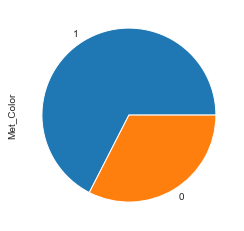

In [18]:
df["Met_Color"].value_counts().plot(kind='pie')

In [19]:
df["Automatic"].value_counts()

0    1356
1      80
Name: Automatic, dtype: int64

<AxesSubplot:ylabel='Automatic'>

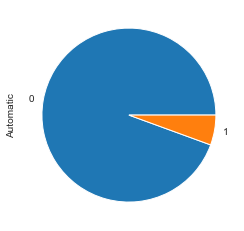

In [20]:
df["Automatic"].value_counts().plot(kind='pie')

In [21]:
df["CC"].value_counts()

1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: CC, dtype: int64

<AxesSubplot:>

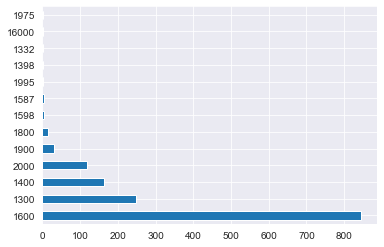

In [22]:
df["CC"].value_counts().plot(kind='barh')

In [23]:
df["Doors"].value_counts()

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

<AxesSubplot:>

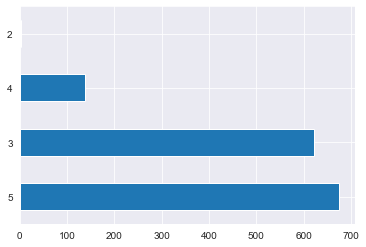

In [24]:
df["Doors"].value_counts().plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

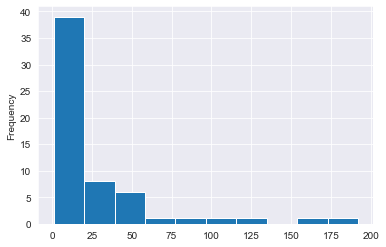

In [25]:
df["Weight"].value_counts().plot(kind='hist')

<AxesSubplot:xlabel='Weight', ylabel='Density'>

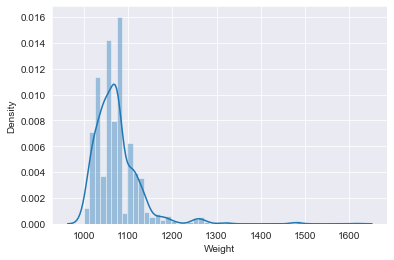

In [26]:
sns.distplot(df['Weight'])

<AxesSubplot:>

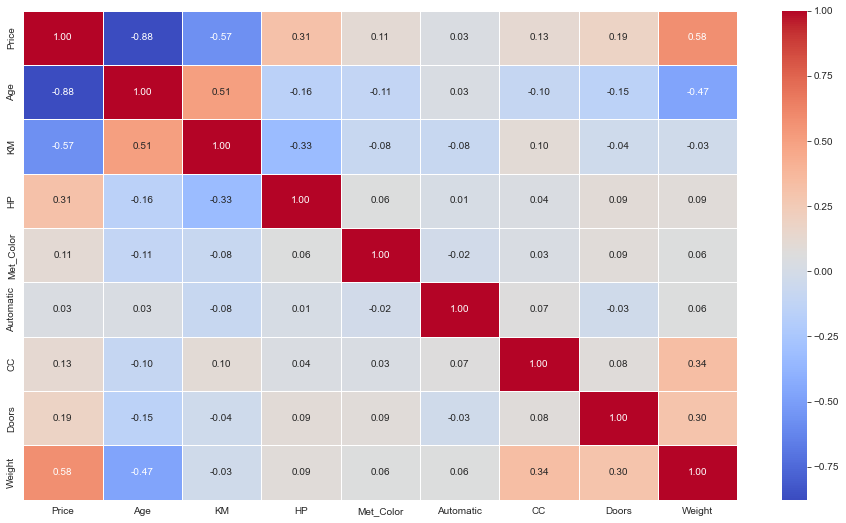

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,annot=True,fmt='.2f')

In [28]:
pd.crosstab(index = df['Fuel_Type'], columns = 'count', dropna = True)

col_0,count
Fuel_Type,
CNG,17
Diesel,155
Petrol,1264


In [29]:
pd.crosstab(index = df['Automatic'], columns = df['Fuel_Type'], dropna = True)

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,16,155,1185
1,1,0,79


In [30]:
pd.crosstab(index = df['Automatic'], columns = df['Fuel_Type'], normalize = True, dropna = True) 

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011142,0.107939,0.825209
1,0.000696,0.000000,0.055014


In [31]:
pd.crosstab(index = df['Automatic'], columns = df['Fuel_Type'],margins = True, normalize = True, dropna = True)

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011142,0.107939,0.825209,0.94429
1,0.000696,0.000000,0.055014,0.05571
All,0.011838,0.107939,0.880223,1.00000


In [32]:
pd.crosstab(index = df['Automatic'], columns = df['Fuel_Type'],margins = True, normalize = 'index', dropna = True)

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011799,0.114307,0.873894
1,0.012500,0.000000,0.987500
All,0.011838,0.107939,0.880223


In [33]:
pd.crosstab(index = df['Automatic'], columns = df['Fuel_Type'],margins = True, normalize = 'columns', dropna = True)

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.941176,1.0,0.9375,0.94429
1,0.058824,0.0,0.0625,0.05571


<AxesSubplot:xlabel='Age', ylabel='Price'>

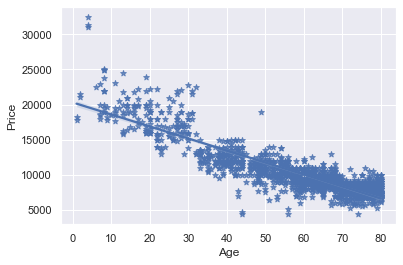

In [34]:
sns.set(style = 'darkgrid')
sns.regplot(x = df['Age'], y = cars['Price'], marker = '*')

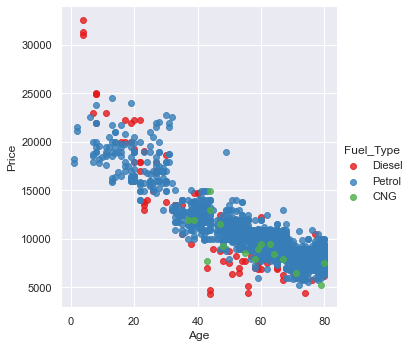

In [35]:
sns.lmplot(x = 'Age', y = 'Price', data = df, hue = 'Fuel_Type', fit_reg= False, legend = True, palette ='Set1')

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

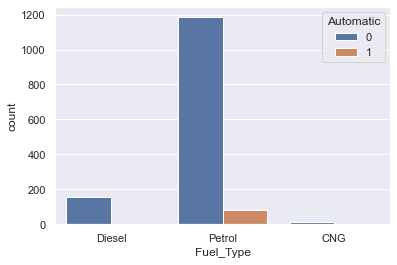

In [36]:
sns.countplot(x = 'Fuel_Type', data = df, hue = 'Automatic')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

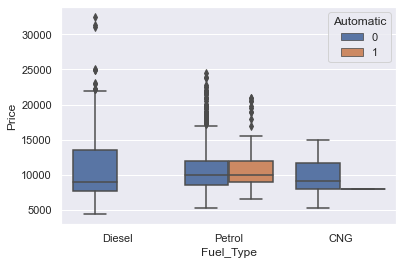

In [37]:
sns.boxplot(y = df['Price'], x = df['Fuel_Type'], hue = df['Automatic'])

<AxesSubplot:xlabel='Price'>

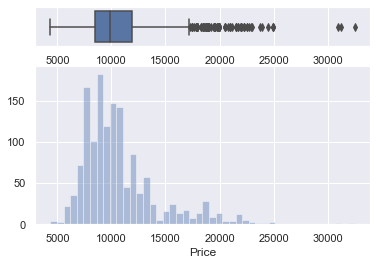

In [38]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})
sns.boxplot(df['Price'], ax = ax_box)
sns.distplot(df['Price'], ax = ax_hist, kde = False)

In [39]:
df = pd.get_dummies(df)

In [40]:
df

,Price,Age,KM,HP,Met_Color,Automatic,CC,Doors,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1,0,1300,3,1025,0,0,1
1432,10845,72,19000,86,0,0,1300,3,1015,0,0,1
1433,8500,71,17016,86,0,0,1300,3,1015,0,0,1
1434,7250,70,16916,86,1,0,1300,3,1015,0,0,1


In [41]:
X = df.drop('Price', axis = 1).values
y = df.iloc[:, 0].values.reshape(-1,1)

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [43]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 11)
Shape of X_test:  (359, 11)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [45]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7225386343117088
R2_score (train):  0.8671584711095707
R2_score (test):  0.8517686034857969
RMSE:  1450.356895825332


# Polynomial Regression - 2nd degree

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [47]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.7225386343117088
R2_score (train):  0.9129316107796507
R2_score (test):  0.7836786115764579
RMSE:  1752.0823510450625


# Measuring the Error

In [49]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean())]

In [50]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1450.356896,0.867158,0.851769,0.722539
1,Polynomial Regression (2nd),1752.082351,0.912932,0.783679,0.722539


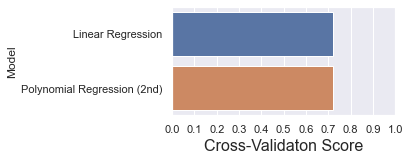

In [53]:
f, axe = plt.subplots(1,1, figsize=(4,2))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

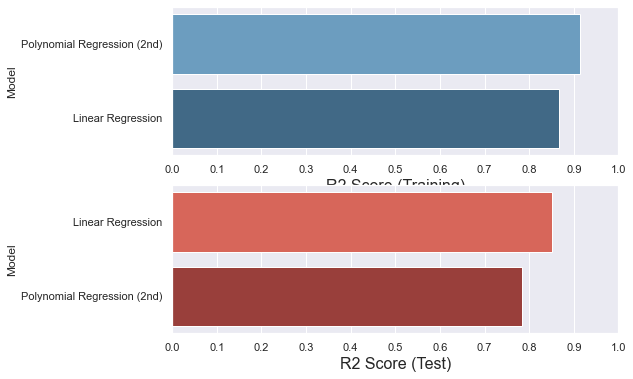

In [55]:
f, axes = plt.subplots(2,1, figsize=(8,6))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

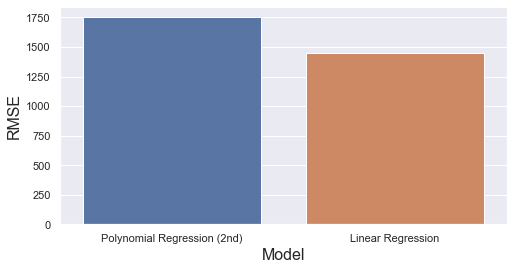

In [57]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(8,4))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

In this kernel, I have built 2 regression models using Toyota Corolla Dataset. They are linear and polynomial regression.
Then measured and visualized the performance of the models.